# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/PGP-DSBA/

df = pd.read_csv('Train.csv') 
df_test = pd.read_csv('Test.csv') 

Mounted at /content/drive
/content/drive/My Drive/PGP-DSBA


In [ ]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

In [ ]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

## Data Overview

In [ ]:
# let's create a copy of the training data
data = df.copy()

In [ ]:
# let's create a copy of the training data
data_test = df_test.copy()

In [ ]:
# let's view the first 5 rows of the data
data.head(5) ##  Complete the code to view top 5 rows of the data

In [ ]:
# let's view the last 5 rows of the data
data.tail(5) ##  Complete the code to view last 5 rows of the data  

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

In [ ]:

# checking for duplicate values
data.duplicated().sum()

In [ ]:
# let's check for missing values in the data
data.isnull().sum()

In [ ]:
# let's check for missing values in the data
data_test.duplicated().sum()

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

## EDA

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

In [ ]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None)
    

**Observations:**

-

-

-

### Let's look at the values in target variable

#####Distribution of Target variable in training set

In [ ]:
data["Target"].value_counts() 


In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data["Target"])
plt.show()

#####Distribution of Target variable in test set

In [ ]:
data_test["Target"].value_counts()

NameError: ignored

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data_test["Target"])
plt.show()

NameError: ignored

<Figure size 360x288 with 0 Axes>

## Data Pre-Processing

In [ ]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y) 

print(X_train.shape, X_val.shape, X_test.shape)

NameError: ignored

In [ ]:
y_train.value_counts()

NameError: ignored

In [ ]:
y_val.value_counts()

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
type(X_val)

In [ ]:
type(X_test)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

print(X_val.isnull().sum())
print("-" * 30)

print(X_test.isna().sum())
print("-" * 30)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

NameError: ignored

In [ ]:
names

['Logistic regression', 'Bagging', 'dtree', 'Random forest', 'Adaboost', 'GBM']

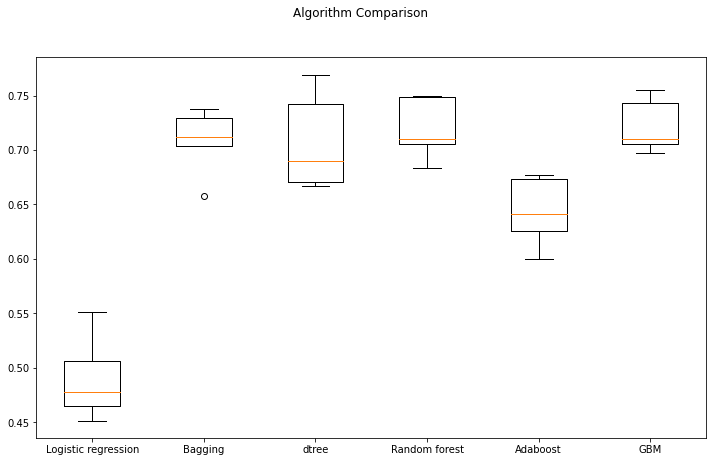

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(12, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 777
Before OverSampling, counts of label '0': 13223 

After OverSampling, counts of label '1': 13223
After OverSampling, counts of label '0': 13223 

After OverSampling, the shape of train_X: (26446, 40)
After OverSampling, the shape of train_y: (26446,) 



In [ ]:
models_ovrsmpl = []  # Empty list to store all the models

# Appending models into the list
models_ovrsmpl.append(("Logistic regression", LogisticRegression(random_state=1)))
models_ovrsmpl.append(("Bagging", BaggingClassifier(random_state=1)))
models_ovrsmpl.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_ovrsmpl.append(("Random forest", RandomForestClassifier(random_state=1)))
models_ovrsmpl.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_ovrsmpl.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_ovrsmpl.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_ovrsmpl = []  # Empty list to store all model's CV scores
names_ovrsmpl = []  # Empty list to store name of the models
scores_ovrsmpl = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name_ovrsmpl, models_ovrsmpl in models_ovrsmpl:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=models_ovrsmpl, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results_ovrsmpl.append(cv_result)
    names_ovrsmpl.append(name_ovrsmpl)
    print("{}: {}".format(name_ovrsmpl, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for names_ovrsmpl, models_ovrsmpl in models:
    models_ovrsmpl.fit(X_train, y_train)
    scores_ovrsmpl = recall_score(y_val, models_ovrsmpl.predict(X_val))
    print("{}: {}".format(names_ovrsmpl, scores_ovrsmpl))


Cross-Validation Cost:

Logistic regression: 0.4902481389578163
Bagging: 0.707808105872622
dtree: 0.7078246484698097
Random forest: 0.7194127377998345
Adaboost: 0.6434656741108354
GBM: 0.7220016542597187
Xgboost: 0.7387262200165426

Validation Performance:

Logistic regression: 0.5015015015015015
Bagging: 0.7267267267267268
dtree: 0.7057057057057057
Random forest: 0.7357357357357357
Adaboost: 0.6516516516516516
GBM: 0.7357357357357357


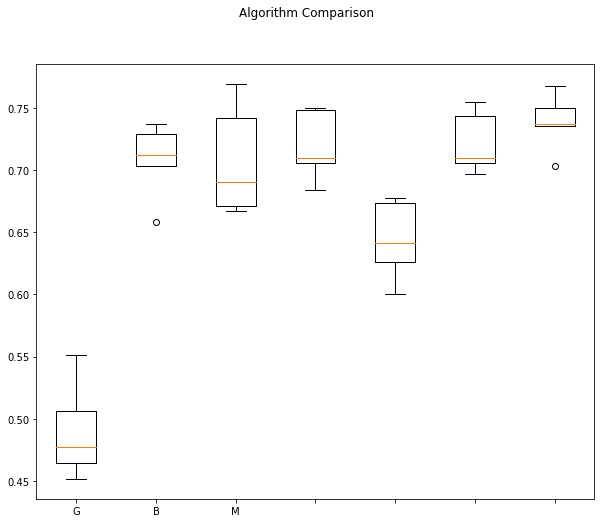

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_ovrsmpl)
ax.set_xticklabels(names_ovrsmpl)

plt.show()

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 777
Before UnderSampling, counts of label '0': 13223 

After UnderSampling, counts of label '1': 777
After UnderSampling, counts of label '0': 777 

After UnderSampling, the shape of train_X: (1554, 40)
After UnderSampling, the shape of train_y: (1554,) 



In [ ]:
%%time
## Complete the code to build models on undersampled data 
models_undsmpl = []  # Empty list to store all the models

# Appending models into the list

models_undsmpl.append(
    ("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1))
)
models_undsmpl.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_undsmpl.append(("Random forest", RandomForestClassifier(random_state=1)))
models_undsmpl.append(("Bagging", BaggingClassifier(random_state=1)))
models_undsmpl.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_undsmpl.append(("GBM", GradientBoostingClassifier(random_state=1)))
#models_undsmpl.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_undsmpl = []  # Empty list to store all model's CV scores
names_undsmpl = []  # Empty list to store name of the models
score_undsmpl = []

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_undsmpl:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_undsmpl.append(cv_result)
    names_undsmpl.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Performance:

Logistic Regression: 0.8726220016542598
dtree: 0.8622167080231596
Random forest: 0.9034822167080232
Bagging: 0.880339123242349
Adaboost: 0.8725971877584782
GBM: 0.8932009925558313
CPU times: user 15.1 s, sys: 319 ms, total: 15.4 s
Wall time: 15 s


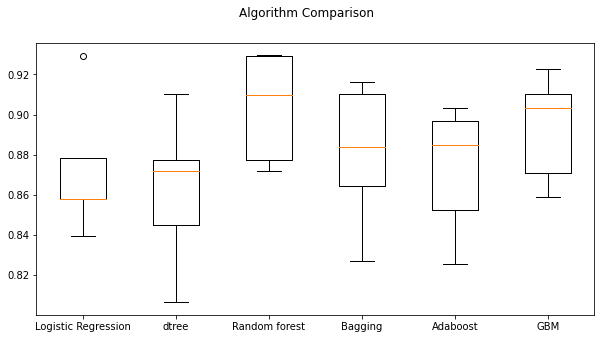

In [ ]:
# Plotting boxplots for CV scores of all models defined above
# boxplot to check model performance on undersampled data
fig = plt.figure(figsize=(10, 5))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_undsmpl)
ax.set_xticklabels(names_undsmpl)

plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
#%%time 

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
                       DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1), 
                       DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5, 
    random_state=1
    )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) #Code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

KeyboardInterrupt: ignored

In [ ]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators = 200, 
    learning_rate = 0.2, 
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_ada.fit(X_train_over,y_train_over) # fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(
    tuned_ada, 
    X_train_over, 
    y_train_over
    )
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.994,0.991,0.997,0.994


In [ ]:
ada_val_perf = model_performance_classification_sklearn(
    tuned_ada, 
    X_val, 
    y_val
    )
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.980,0.844,0.803,0.823


### Tuning Random forest using undersampled data

In [ ]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5,
    random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) #Code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=300,
    min_samples_leaf=1,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, 
    X_train_un, 
    y_train_un
    )
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.978,0.999,0.988


In [ ]:
rf2_val_perf = model_performance_classification_sklearn(
    tuned_rf2, 
    X_val, 
    y_val
    )
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.934,0.880,0.451,0.597


### Tuning Gradient Boosting using oversampled data

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, 
    X_train_over, 
    y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.989,0.988,0.990,0.989


In [ ]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, 
    X_val, 
    y_val
)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.961,0.844,0.603,0.703


### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over,y_train_over)## Complete the code to fit the model on over sampled data

XGBClassifier(eval_metric='logloss', learning_rate=0.2, n_estimators=250,
              random_state=1, scale_pos_weight=10, subsample=0.8)

In [ ]:
xgb2_train_perf =  model_performance_classification_sklearn(
    xgb2, 
    X_train_over, 
    y_train_over
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.983,1.000,0.968,0.984


In [ ]:
xgb2_val_perf =  model_performance_classification_sklearn(
    xgb2, 
    X_val, 
    y_val
    )

xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.944,0.886,0.497,0.637


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.989,0.994,0.988,0.983
Recall,0.988,0.991,0.978,1.000
Precision,0.990,0.997,0.999,0.968
F1,0.989,0.994,0.988,0.984


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost classifier tuned with oversampled data,Random forest tuned with undersampled data,XGBoost tuned with oversampled data
Accuracy,0.961,0.980,0.934,0.944
Recall,0.844,0.844,0.880,0.886
Precision,0.603,0.803,0.451,0.497
F1,0.703,0.823,0.597,0.637


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
'_______' ## Write the code to check the performance of best model on test data

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  '_______' ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [ ]:
Model = Pipeline('_______' ) ## Complete the code to create pipeline for the best model

In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.'_______' ##  Complete the code to drop target variable from test data
y_test1 = df_test.'_______' ##  Complete the code to store target variable in y_test1


In [ ]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


# We don't need to impute missing values in test set as it will be done inside pipeline

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [ ]:
Model.'_______' ##  Complete the code to fit the Model obtained from above step

In [ ]:
Model_test = '_______'  ## Complete the code to check the performance on test set
Model_test

# Business Insights and Conclusions


- Best model and its performance
- Important features
- Additional points

***